<a href="https://colab.research.google.com/github/jlb719ru/gisclass/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

United States Burglary, Larceny, and Robbery Data Rates from 1960 to 2019

Plan: My research will be based on my interest in criminal data and statistics. The data shown portrays that certain states of the U.S.obtain various crime rates. The data that I will be studying looks at state-by-state burglary, larceny, and robbery rates that occurred in the United States between the years of 1960 and 2019. The U.S. Department of Justice and the Federal Bureau of Investigation worked together to compile this data for the Unified Crime Reporting Statistics, making it readily available to the public.

Resources: United States crime data was found at https://corgis-edu.github.io/corgis/csv/state_crime/ My geographic shapefile that I used to create my map was found at https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [1]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )


!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.7 MB/s eta 0:00:00


In [2]:
state_crime=pd.read_csv('https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv', header=None)

In [3]:
#aok: instead of saying drop like 10 times, just subset/slice data like we did in class:
# https://www.google.com/search?client=firefox-b-1-d&q=pandas+subset+dataset
df = pd.read_csv("https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv")
df = df.drop("Year",axis=1)
df = df.drop("Data.Population",axis=1)
df = df.drop("Data.Rates.Property.All",axis=1)
df = df.drop("Data.Rates.Property.Larceny",axis=1)
df = df.drop("Data.Rates.Property.Motor",axis=1)
df = df.drop("Data.Rates.Violent.All",axis=1)
df = df.drop("Data.Rates.Violent.Assault",axis=1)
df = df.drop("Data.Rates.Violent.Rape",axis=1)
df = df.drop("Data.Rates.Violent.Robbery",axis=1)
df = df.drop("Data.Rates.Violent.Murder",axis=1)
df = df.drop("Data.Totals.Property.All",axis=1)
df = df.drop("Data.Totals.Property.Burglary",axis=1)
df = df.drop("Data.Totals.Property.Larceny",axis=1)
df = df.drop("Data.Totals.Property.Motor",axis=1)
df = df.drop("Data.Totals.Violent.All",axis=1)
df = df.drop("Data.Totals.Violent.Murder",axis=1)
df = df.drop("Data.Totals.Violent.Assault",axis=1)
df = df.drop("Data.Totals.Violent.Rape",axis=1)
df = df.drop("Data.Totals.Violent.Robbery",axis=1)
df

,State,Data.Rates.Property.Burglary
0,Alabama,355.9
1,Alabama,339.3
2,Alabama,349.1
3,Alabama,376.9
4,Alabama,466.6
...,...,...
3110,Wyoming,300.6
3111,Wyoming,302.5
3112,Wyoming,275.0
3113,Wyoming,264.0


In [ ]:
! wget -q -O usmap.zip "https://github.com/jlb719ru/gisclass/raw/main/cb_2018_us_state_500k%20(1).zip"
zip_ref = zipfile.ZipFile('usmap.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

<Axes: >

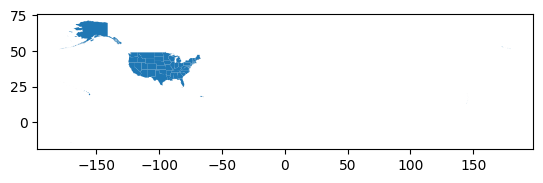

In [ ]:
usmap=gpd.read_file('cb_2018_us_state_500k.shp')


usmap.plot()

In [ ]:
#aok: but check if everything merged ok with option outer; and which years is this for? all the years? is it a mean or what?
#i'd slow down and be more careful
#and interpretation: say its 126--what does it mean? 126 burglaries per person???

<Axes: >

Text(0.5, 1.0, 'United States Property Burglary Data Rates from 1960 to 2019')

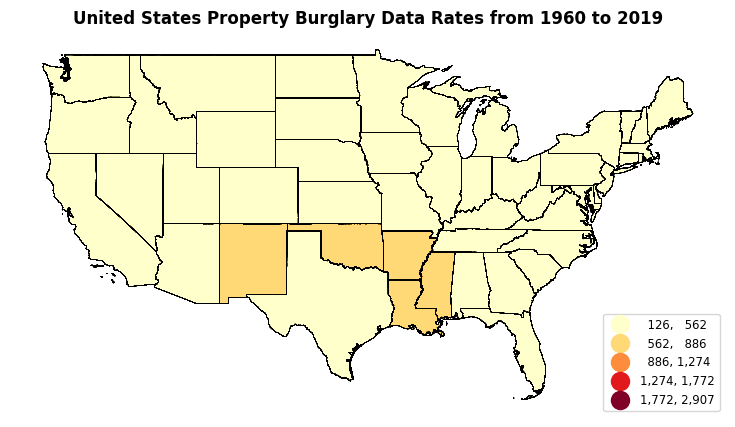

In [4]:
shape_path = 'https://github.com/jlb719ru/gisclass/raw/main/cb_2018_us_state_500k%20(1).zip'
shape = gpd.read_file(shape_path)
shape = pd.merge(
    left=shape,
    right=df,
    left_on='NAME',
    right_on='State',
    how='left'
)

shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 5))
shape.plot(ax=ax, column='Data.Rates.Property.Burglary', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5, legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('United States Property Burglary Data Rates from 1960 to 2019', size=12, weight='bold')

Interpretation: It is considered burglary when a building or property is entered without permission with the intent of committing a crime, specifically theft. According to these data rates, New Mexico, Oklahoma, Arkansas, Louisiana, and Mississippi all acquire data rates on the higher end of the spectrum between the years of 1960 and 2019. The other states obtain data rates on the lower side.

In [ ]:
df = pd.read_csv("https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv")
df = df.drop("Year",axis=1)
df = df.drop("Data.Population",axis=1)
df = df.drop("Data.Rates.Property.All",axis=1)
df = df.drop("Data.Rates.Property.Burglary",axis=1)
df = df.drop("Data.Rates.Property.Motor",axis=1)
df = df.drop("Data.Rates.Violent.All",axis=1)
df = df.drop("Data.Rates.Violent.Assault",axis=1)
df = df.drop("Data.Rates.Violent.Rape",axis=1)
df = df.drop("Data.Rates.Violent.Robbery",axis=1)
df = df.drop("Data.Rates.Violent.Murder",axis=1)
df = df.drop("Data.Totals.Property.All",axis=1)
df = df.drop("Data.Totals.Property.Burglary",axis=1)
df = df.drop("Data.Totals.Property.Larceny",axis=1)
df = df.drop("Data.Totals.Property.Motor",axis=1)
df = df.drop("Data.Totals.Violent.All",axis=1)
df = df.drop("Data.Totals.Violent.Murder",axis=1)
df = df.drop("Data.Totals.Violent.Assault",axis=1)
df = df.drop("Data.Totals.Violent.Rape",axis=1)
df = df.drop("Data.Totals.Violent.Robbery",axis=1)
df

,State,Data.Rates.Property.Larceny
0,Alabama,592.1
1,Alabama,569.4
2,Alabama,634.5
3,Alabama,683.4
4,Alabama,784.1
...,...,...
3110,Wyoming,1500.9
3111,Wyoming,1518.2
3112,Wyoming,1421.0
3113,Wyoming,1375.9


<Axes: >

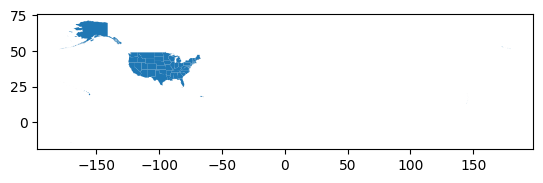

In [ ]:
usmap=gpd.read_file('cb_2018_us_state_500k.shp')


usmap.plot()

<Axes: >

Text(0.5, 1.0, 'United States Property Larceny Data Rates from 1960 to 2019')

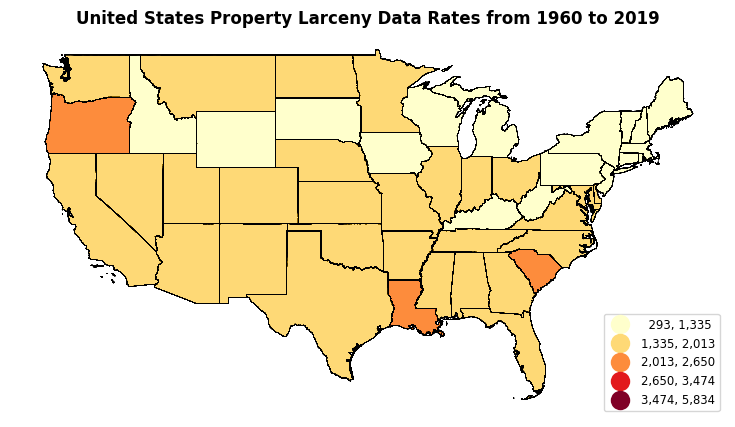

In [ ]:
shape_path = 'https://github.com/jlb719ru/gisclass/raw/main/cb_2018_us_state_500k%20(1).zip'
shape = gpd.read_file(shape_path)
shape = pd.merge(
    left=shape,
    right=df,
    left_on='NAME',
    right_on='State',
    how='left'
)

shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 5))
shape.plot(ax=ax, column='Data.Rates.Property.Larceny', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5, legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('United States Property Larceny Data Rates from 1960 to 2019', size=12, weight='bold')

Interpretation: Larceny is considered to be and stealing or theft. Examples of such include shoplifting, pocket-picking, motor vehicle part theft, and any sort of stealing without use of force. Given the data collected from 1960 to 2019, larceny rates in the United States are overall much higher than burglary and robbery rates.

In [ ]:
df = pd.read_csv("https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv")
df = df.drop("Year",axis=1)
df = df.drop("Data.Population",axis=1)
df = df.drop("Data.Rates.Property.All",axis=1)
df = df.drop("Data.Rates.Property.Burglary",axis=1)
df = df.drop("Data.Rates.Property.Larceny",axis=1)
df = df.drop("Data.Rates.Property.Motor",axis=1)
df = df.drop("Data.Rates.Violent.All",axis=1)
df = df.drop("Data.Rates.Violent.Assault",axis=1)
df = df.drop("Data.Rates.Violent.Rape",axis=1)
df = df.drop("Data.Rates.Violent.Murder",axis=1)
df = df.drop("Data.Totals.Property.All",axis=1)
df = df.drop("Data.Totals.Property.Burglary",axis=1)
df = df.drop("Data.Totals.Property.Larceny",axis=1)
df = df.drop("Data.Totals.Property.Motor",axis=1)
df = df.drop("Data.Totals.Violent.All",axis=1)
df = df.drop("Data.Totals.Violent.Murder",axis=1)
df = df.drop("Data.Totals.Violent.Assault",axis=1)
df = df.drop("Data.Totals.Violent.Rape",axis=1)
df = df.drop("Data.Totals.Violent.Robbery",axis=1)
df

,State,Data.Rates.Violent.Robbery
0,Alabama,27.5
1,Alabama,19.1
2,Alabama,22.5
3,Alabama,24.7
4,Alabama,29.1
...,...,...
3110,Wyoming,10.1
3111,Wyoming,10.1
3112,Wyoming,13.1
3113,Wyoming,17.3


<Axes: >

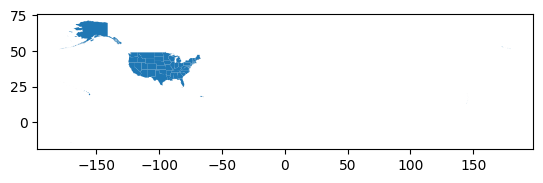

In [ ]:
usmap=gpd.read_file('cb_2018_us_state_500k.shp')


usmap.plot()

<Axes: >

Text(0.5, 1.0, 'United States Violent Robbery Data Rates from 1960 to 2019')

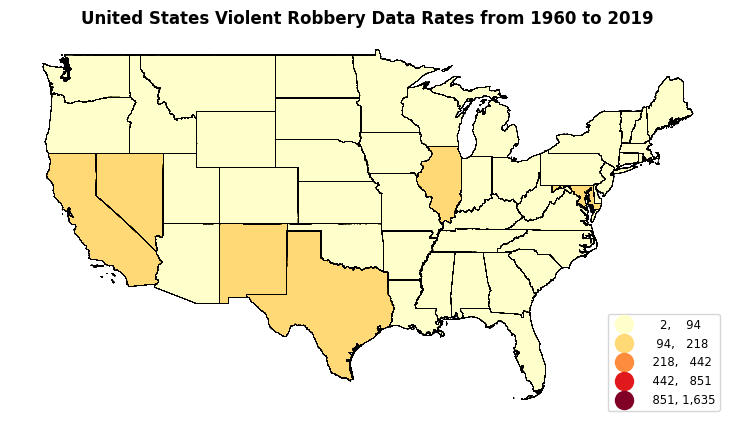

In [ ]:
shape_path = 'https://github.com/jlb719ru/gisclass/raw/main/cb_2018_us_state_500k%20(1).zip'
shape = gpd.read_file(shape_path)
shape = pd.merge(
    left=shape,
    right=df,
    left_on='NAME',
    right_on='State',
    how='left'
)

shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 5))
shape.plot(ax=ax, column='Data.Rates.Violent.Robbery', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5, legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('United States Violent Robbery Data Rates from 1960 to 2019', size=12, weight='bold')

Interpretation: Robbery is when someone or a group of individuals use force or threat of force to unlawfully obtain property from a person or place. According to the data and map above, California, Nevada, New Mexico, Texas, Illinois, and Maryland obtain the highest rates of robbery from 1960 to 2019.